<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

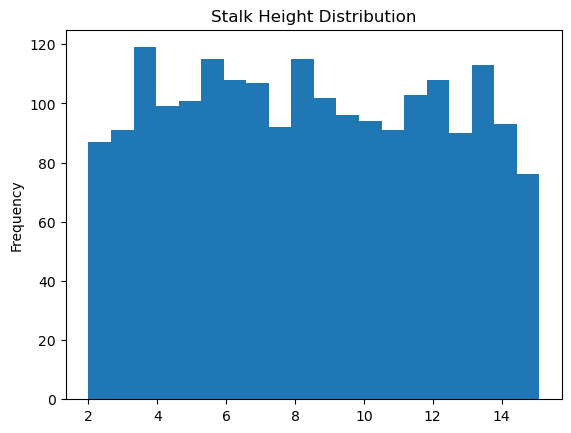

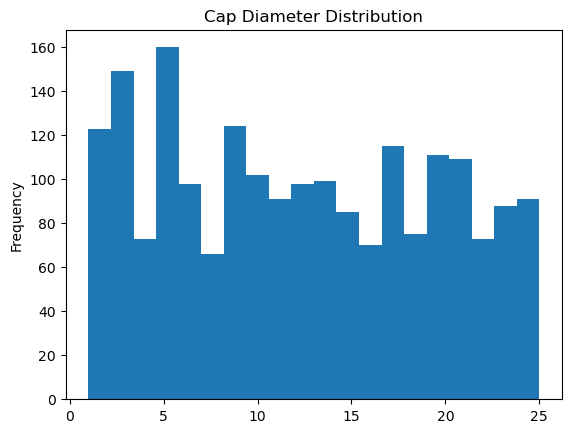

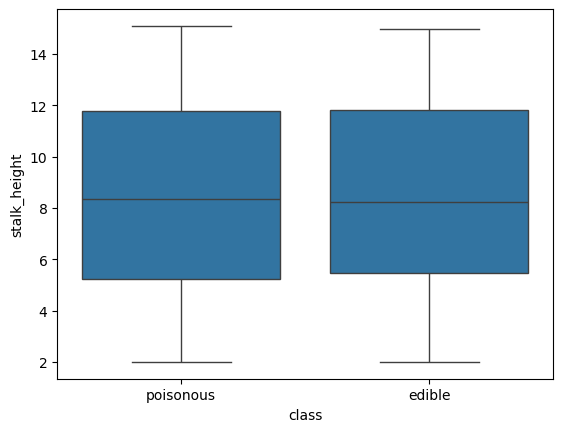

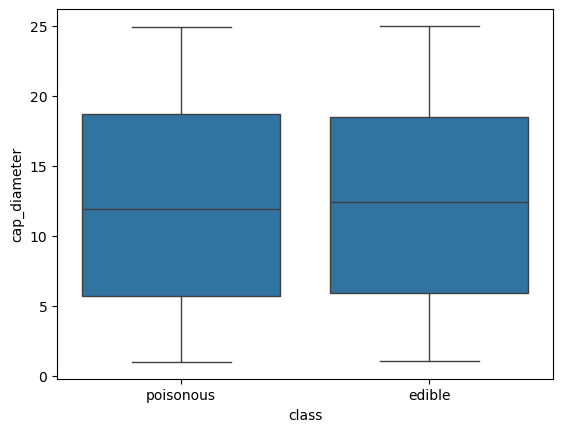

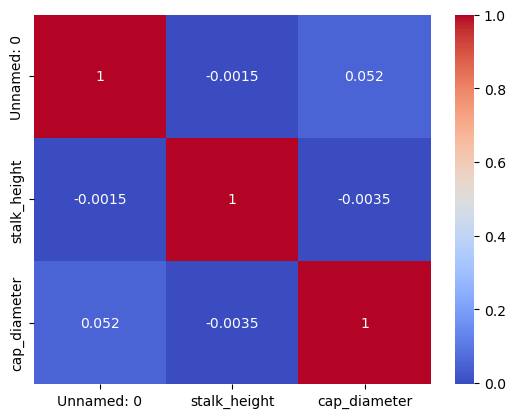

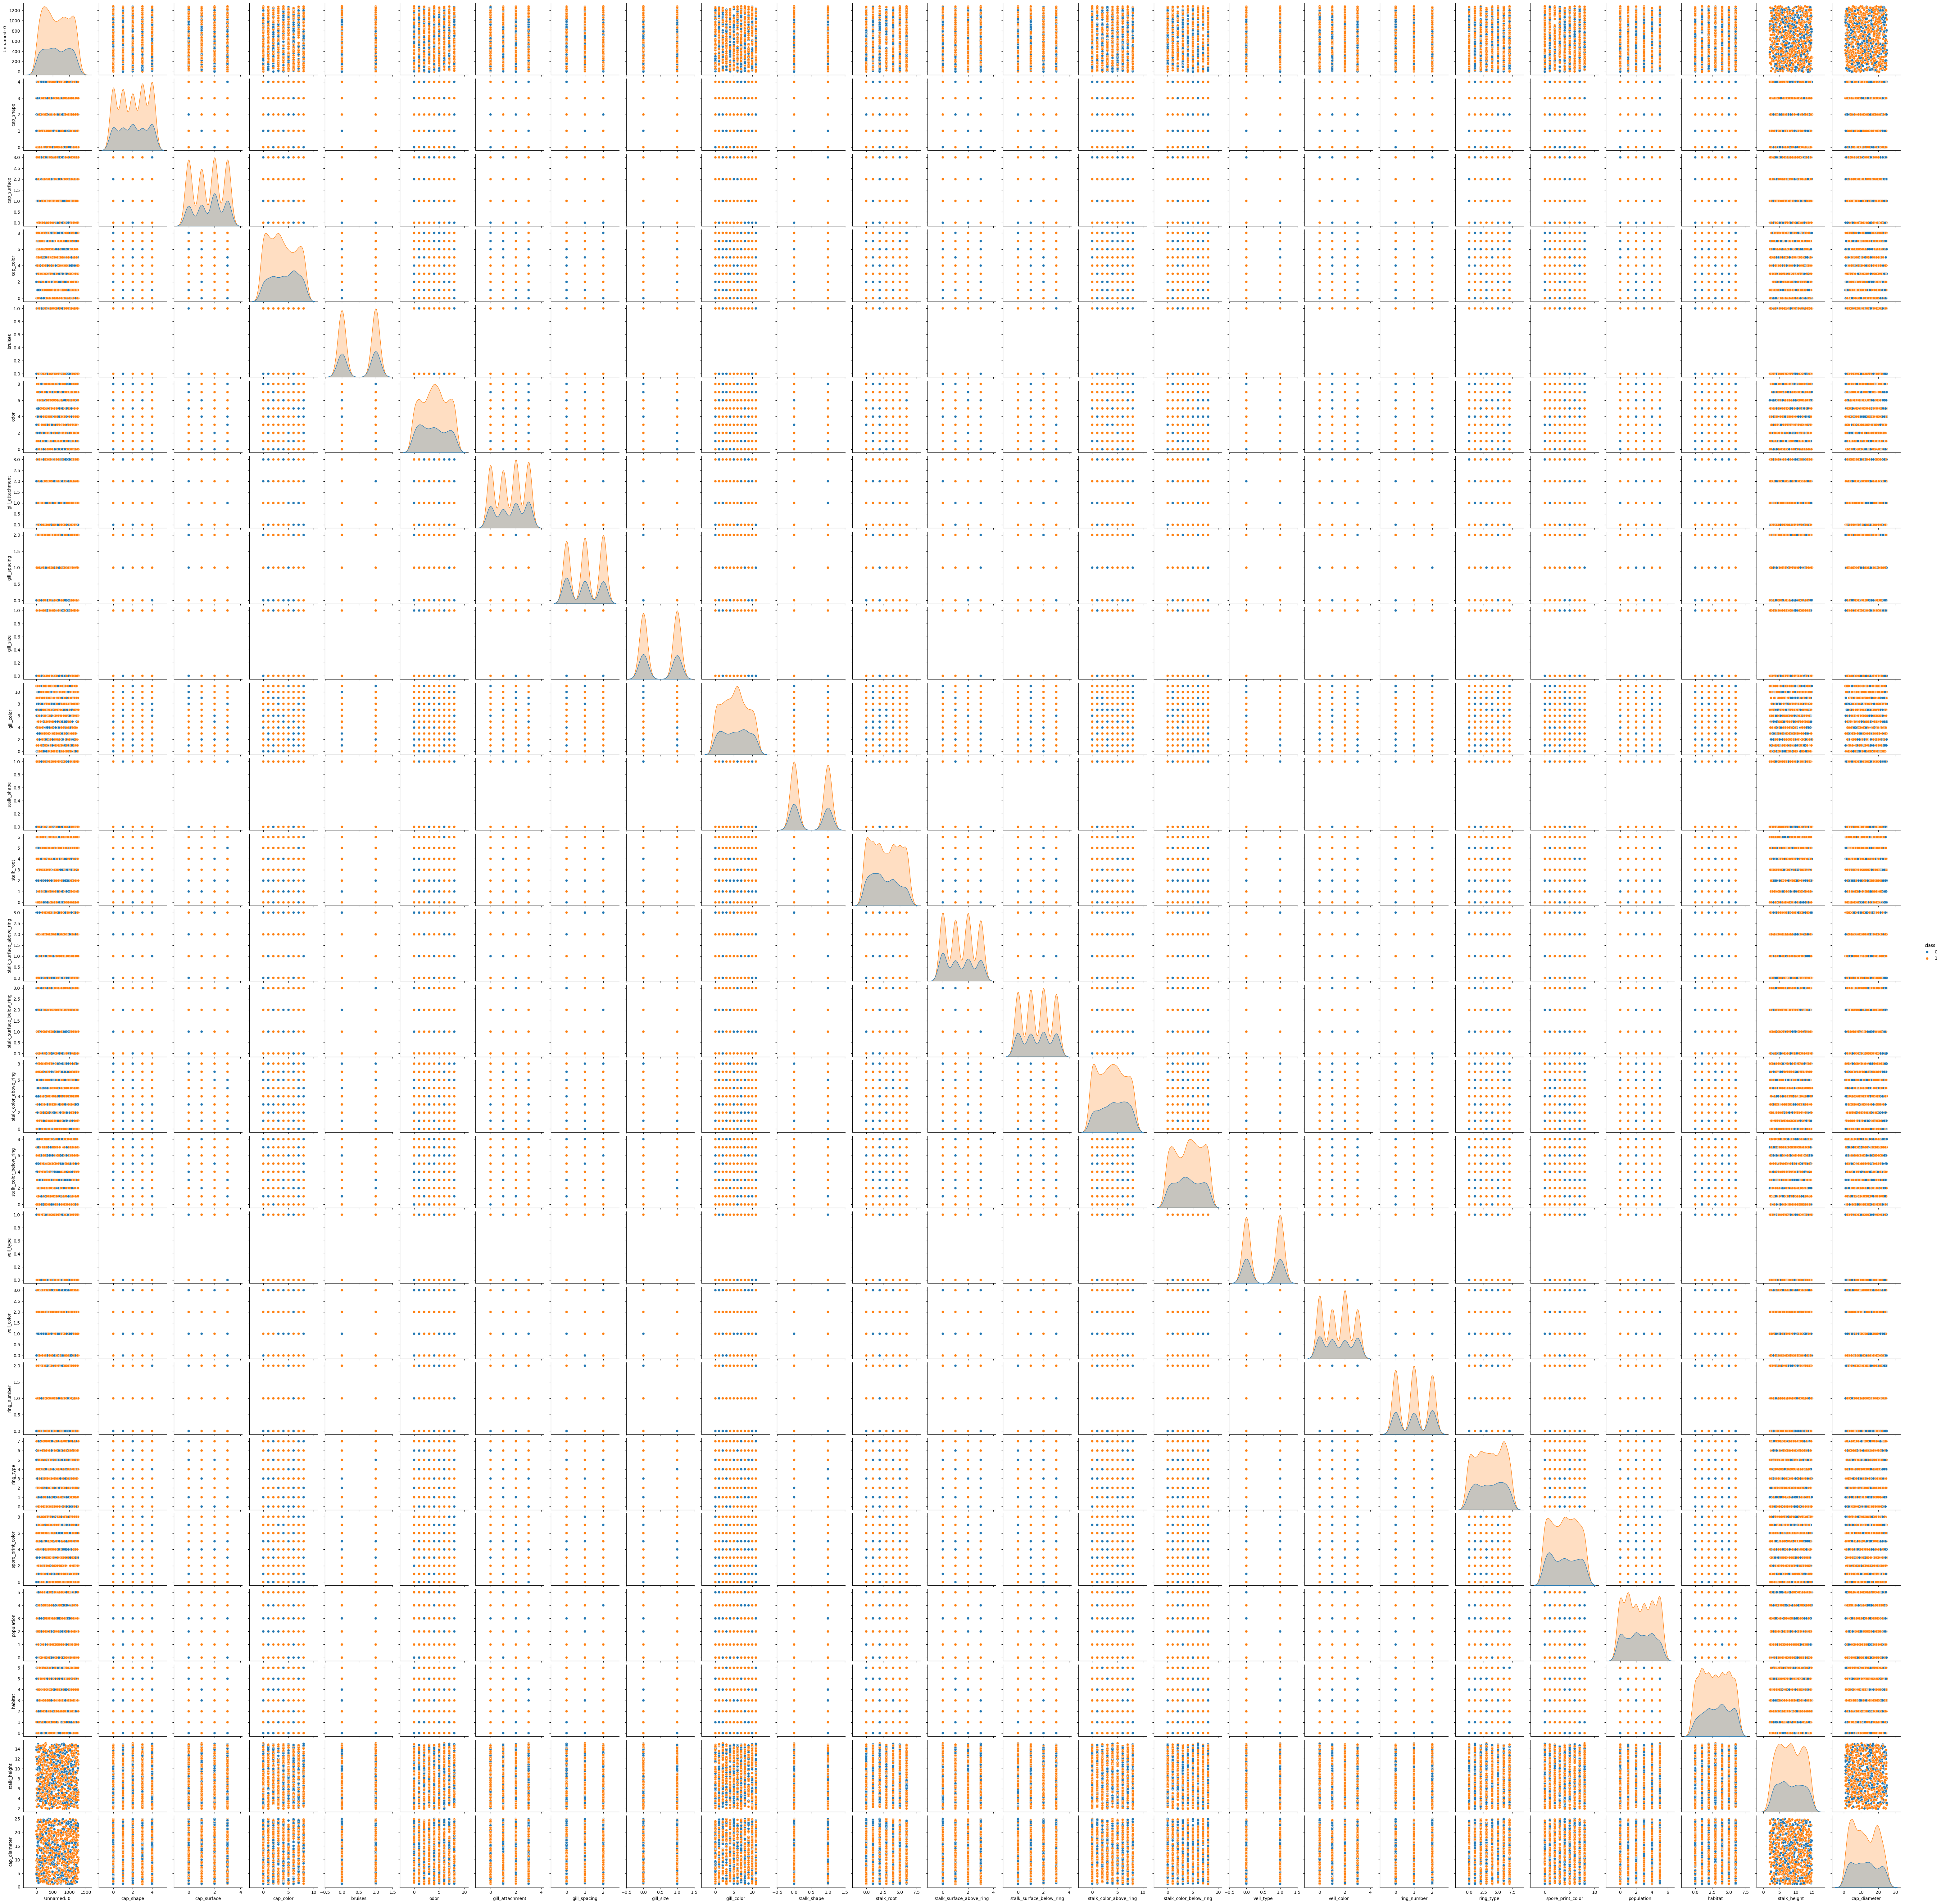

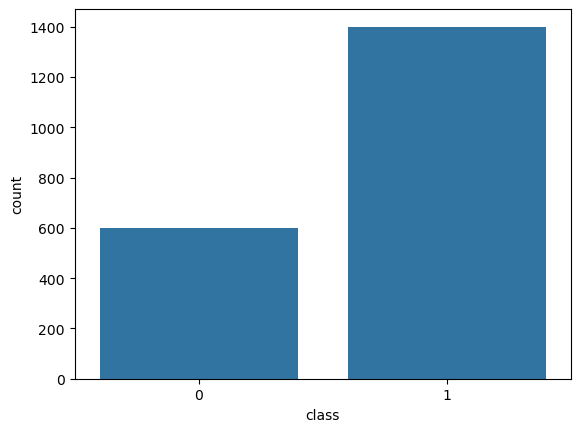

Accuracy: 0.6916666666666667
Precision: 0.6916666666666667
Recall: 1.0
F1 Score: 0.8177339901477833


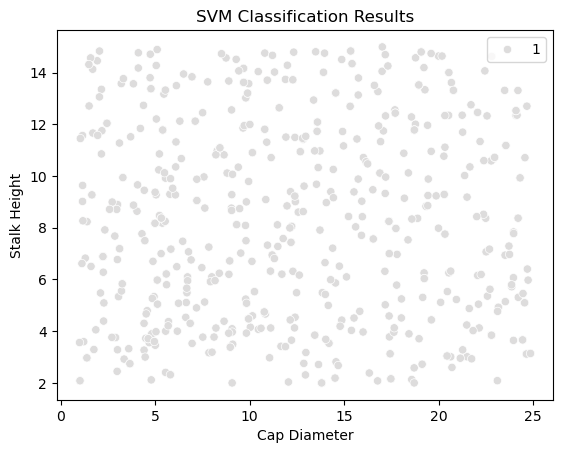

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Task 1: Load the Mushroom dataset and perform exploratory data analysis (EDA)
df = pd.read_csv(r'C:\Users\User\Downloads\SVM\SVM\mushroom.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Visualizations for numeric feature distributions
df['stalk_height'].plot(kind='hist', bins=20, title='Stalk Height Distribution')
plt.show()

df['cap_diameter'].plot(kind='hist', bins=20, title='Cap Diameter Distribution')
plt.show()

# Boxplots to visualize feature distributions
sns.boxplot(x='class', y='stalk_height', data=df)
plt.show()

sns.boxplot(x='class', y='cap_diameter', data=df)
plt.show()

# Exclude non-numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation between numeric features
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Task 2: Data Preprocessing
# Encode categorical variables
le = LabelEncoder()

categorical_columns = ['cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor', 'gill_attachment', 
                       'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root', 
                       'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 
                       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number', 
                       'ring_type', 'spore_print_color', 'population', 'habitat', 'class']

# Apply label encoding to categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['class'])
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Task 3: Data Visualization
# Visualizing feature relationships using pairplot
sns.pairplot(df, hue='class')
plt.show()

# Visualize the class distribution
sns.countplot(x='class', data=df)
plt.show()

# Task 4: SVM Implementation
# Implement SVM classifier with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM model
svm.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = svm.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Task 5: Visualization of SVM Results
# Visualization of the SVM results
sns.scatterplot(x=X_test['cap_diameter'], y=X_test['stalk_height'], hue=y_pred, palette='coolwarm')
plt.title('SVM Classification Results')
plt.xlabel('Cap Diameter')
plt.ylabel('Stalk Height')
plt.show()

# Task 6: Parameter Tuning and Optimization
# Hyperparameter tuning using GridSearchCV
parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the optimized model
y_pred_optimized = grid_search.best_estimator_.predict(X_test)

# Evaluate performance of optimized model
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("Optimized Precision:", precision_score(y_test, y_pred_optimized))
print("Optimized Recall:", recall_score(y_test, y_pred_optimized))
print("Optimized F1 Score:", f1_score(y_test, y_pred_optimized))

# Task 7: Comparison and Analysis
# Compare SVM with different kernels (linear, polynomial, and RBF)
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    y_pred_kernel = svm.predict(X_test)
    print(f"{kernel} kernel:")
    print("Accuracy:", accuracy_score(y_test, y_pred_kernel))
    print("Precision:", precision_score(y_test, y_pred_kernel))
    print("Recall:", recall_score(y_test, y_pred_kernel))
    print("F1 Score:", f1_score(y_test, y_pred_kernel))
    print("-" * 50)

# Analyze strengths and weaknesses of SVM for this dataset:
# SVM with linear kernel might perform well for linearly separable data.
# RBF kernel may be helpful if data has non-linear relationships.
# Polynomial kernel may work for complex decision boundaries.
